# MODELO SUPERVISADO 

##### OBJETIVO: Predecir cuanta energía eólica producirán los países de America del sur en los proximos 5 años 

In [1]:
# Se importan las librerías que se utilizarán: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier   #ver porque si no se usa hay que sacarlo
from sklearn.model_selection import GridSearchCV
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [2]:
wec = pd.read_csv(r'../datasets/wec_reg_lineal')  

In [3]:
wec.head(5)

,country,continente,year,renewables_share_elec,fossil_share_elec,nuclear_share_elec,renewables_electricity,nuclear_electricity,cluster
0,Afghanistan,Asia,2011,70.258,29.742,0.0,0.595,0.0,4.0
1,Afghanistan,Asia,2012,80.921,19.079,0.0,0.738,0.0,4.0
2,Afghanistan,Asia,2013,80.236,19.764,0.0,0.885,0.0,4.0
3,Afghanistan,Asia,2014,86.655,13.345,0.0,1.000,0.0,4.0
4,Afghanistan,Asia,2015,87.776,12.224,0.0,1.034,0.0,4.0


In [4]:
wec = wec.drop(['renewables_share_elec', 'fossil_share_elec', 'nuclear_share_elec', 'nuclear_electricity', 'fossil_share_elec', "continente"],
                  axis=1)

In [5]:
wec.head(5)

,country,year,renewables_electricity,cluster
0,Afghanistan,2011,0.595,4.0
1,Afghanistan,2012,0.738,4.0
2,Afghanistan,2013,0.885,4.0
3,Afghanistan,2014,1.000,4.0
4,Afghanistan,2015,1.034,4.0


In [6]:
# Se consultan los datos únicos que integran la columna country 
len(wec['country'].unique())

203

In [7]:
fig = px.scatter(x=wec["year"], y=wec["renewables_electricity"], color=wec['country'])
fig.show()

Realizamos encoding de la columna categorica "country" dado que el modelo no acepta variables de tipo stirng. 

In [64]:
"""
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
wec["country"] = labelencoder.fit_transform(wec["country"])
"""

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [9]:
wec = pd.get_dummies(wec, columns=['country'], drop_first=True)

In [74]:
"""
var_predictoras = ["country", "year", "cluster"]
var_respuesta = ["renewables_electricity"]
x = wec[var_predictoras]
y = wec[var_respuesta]
""" 

In [10]:
wec.head(4)

,year,renewables_electricity,cluster,country_Albania,country_Algeria,country_American Samoa,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_British Virgin Islands,country_Brunei,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cayman Islands,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Cook Islands,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czechia,country_Democratic Republic of Congo,country_Denmark,country_Djibouti,country_Dominica,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_French Guiana,country_French Polynesia,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Gibraltar,country_Greece,country_Greenland,country_Grenada,country_Guadeloupe,country_Guam,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Kyrgyzstan,country_Laos,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Martinique,country_Mauritania,country_Mauritius,country_Mexico,country_Moldova,country_Mongolia,country_Montenegro,country_Montserrat,country_Morocco,country_Mozambique,country_Namibia,country_Nauru,country_Nepal,country_Netherlands,country_New Caledonia,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Niue,country_North Korea,country_Norway,country_Oman,country_Pakistan,country_Palestine,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Romania,country_Russia,country_Rwanda,country_Saint Helena,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Pierre and Miquelon,country_Saint Vincent and the Grenadines,country_Samoa,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovakia,country_Slovenia,country_Solomon Islands,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Tanzania,country_Thailand,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Turks and Caicos Islands,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_United States Virgin Islands,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,2011,0.595,4.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

Seleccionamos nuestras variables predictoras o explicativas (var_predict) y nuestra variable respuesta que queremos proyectar (var_respuesta).

In [42]:
X = wec.drop(["renewables_electricity"],
                  axis=1)
var_respuesta = ["renewables_electricity"]
y = wec[var_respuesta]

In [12]:
x, y = np.array(x), np.array(y)

Separamos dataset en datos de training y de testing. <br>
Se entrenará con 80% de los datos y se testeará con el 20% de los datos.

In [13]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

In [15]:
X_train.shape

(1516, 204)

In [16]:
X_test.shape

(379, 204)

## Modelos

### Modelo 1

In [18]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred1 = regressor1.predict(X_test)
print(y_pred1)

[[ 6.98614905e+01]
 [-2.19632237e+00]
 [ 4.00292516e+00]
 [ 6.28711401e+01]
 [ 9.70364467e+01]
 [ 3.60842516e+00]
 [ 2.43935766e+01]
 [-7.86684374e+00]
 [ 4.79402796e+00]
 [-1.52049342e+00]
 [ 1.06974234e+02]
 [ 3.07463394e+01]
 [ 9.78339411e+00]
 [ 6.70890507e-01]
 [ 1.78918773e+01]
 [ 1.23912319e+01]
 [ 6.15279193e-01]
 [ 8.66315871e+00]
 [ 8.11854193e+00]
 [ 5.24476274e+00]
 [-4.08561019e+00]
 [ 1.07940673e+00]
 [ 3.40032335e+01]
 [ 1.12697311e+01]
 [ 1.04644117e+02]
 [ 1.24525778e+01]
 [-9.11803852e+00]
 [-5.79012527e+00]
 [ 1.13202815e+01]
 [-3.05901911e+00]
 [ 5.76237226e+00]
 [ 3.80512481e+01]
 [ 2.60916505e+01]
 [-6.65747650e-01]
 [ 2.08747564e+01]
 [ 2.87049398e+00]
 [ 8.33189605e+01]
 [ 2.06438061e+01]
 [ 1.46984553e+03]
 [ 1.39867622e+01]
 [ 9.99464332e+00]
 [ 2.46155265e+01]
 [-9.64548378e+00]
 [ 8.44397368e+00]
 [ 3.37920980e+01]
 [ 1.09344781e+01]
 [ 4.85823616e+01]
 [ 1.16528696e+01]
 [-2.32405521e+00]
 [-3.38192516e+00]
 [-4.89319078e+00]
 [ 1.61893941e+01]
 [-6.3750711

In [20]:
print(regressor1.intercept_)

[-4646.89024979]


In [21]:
print(regressor1.coef_)

[[ 2.33011677e+00 -1.18447346e+01 -4.25167163e+01 -3.56578004e+01
  -3.72270206e+01 -1.77917720e+01 -3.72210206e+01 -2.62371447e+01
  -5.66814759e+01 -3.78530596e+01  1.73822657e+00  4.88823074e+01
  -3.36572712e+01 -3.54499793e+01 -3.74419365e+01 -3.64257003e+01
  -3.73031088e+01 -3.70808734e+01 -4.66800867e+01 -4.79299247e+01
  -3.55717712e+01 -3.60619622e+01 -4.12986378e+01 -1.02912354e+01
  -8.85604374e+00 -3.44503578e+01  4.08145023e+02 -3.57829960e+01
  -3.52837567e+01 -5.37551739e+01 -3.66032046e+01  4.04697276e-01
  -8.87301469e+00 -1.60341702e+01  3.58509980e+02 -3.57794245e+01
  -4.78121759e+01 -3.44505007e+01  1.89122710e+01  1.40504551e+03
   5.01033804e+01 -3.41179125e+01 -1.16984013e+01 -3.71113484e+01
  -3.81599386e+01 -1.96227166e+01 -3.43819626e+01 -3.72372068e+01
  -5.11465621e+01 -3.93002719e+01 -7.32953763e+00 -3.61172984e+01
  -1.21455666e+01 -3.38764108e+01 -8.70435817e+00 -1.96791317e+01
  -2.13683114e+01 -1.14921990e+01 -3.73066088e+01 -3.56041317e+01
  -3.81725

Evaluamos metricas de evaluacion del modelo

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.9779097675602455

### Modelo 2: Random Forest

In [24]:
# Se inicia el modelo
regresor_rf2 = RandomForestRegressor(criterion='absolute_error', random_state=42)

In [26]:
# Se entrena el modelo
regresor_rf2.fit(X_train, y_train);

C:\Users\Luna\AppData\Local\Temp\ipykernel_3860\2473120682.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [27]:
regresor_rf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [28]:
# Se predicen los valores para el set de testeo
y_pred_rf2 = regresor_rf2.predict(X_test)

In [29]:
# Se calcula el error medio absoluto
mean_absolute_error(y_test, y_pred_rf2)

1.5438673746701774

### Modelo 3: Support Vector Machine

In [30]:
# Se inicia el modelo
regresor_svr = SVR(C=1.0, epsilon=0.2)

In [31]:
# Se entrena el modelo
regresor_svr.fit(X_train, y_train)

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(epsilon=0.2)

In [32]:
regresor_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
#Se predicen los valores para el set de testeo
y_pred_svr = regresor_svr.predict(X_test)

In [34]:
# Se calcula el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

26.235664630941635

## ANÁLISIS Y EVALUACIÓN DEL MODELO MÁS ACORDE PARA LA REGRESIÓN

In [35]:
# Se calculan los errores 
def evaluation(y_test, predictions):
    """
    Funcion que devuelve el error absoluto medio y el error porcentual absoluto medio.

    :param y_test: valores reales
    :param predictions: valores predichos

    :return: Devuelve el error absoluto medio y el error porcentual absoluto medio.
    """
    # Calcula mae
    mae = mean_absolute_error(y_test, predictions)
    #calculate mape
    mape = np.mean((np.abs(y_test - predictions)/y_test)*100)
    #print calculated values
    print(f"El error absoluto medio para el modelo es {round(mae, 2)}")
    print(f"El error porcentual absoluto medio para el modelo es {round(mape, 2)}")

In [36]:
def graph_real_pred(y_test, predictions, color):
    """
    Funcion que grafica los valores reales vs. predichos
    :param y_test: valores reales
    :param predictions: valores predichos
    :param color: color para el plot.

    :return: Scatterplot mostrando la relacion entre el valor real y el predicho
    """
    plt.scatter(y_test, predictions, c=color, s=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Real', size=15, labelpad=1)
    plt.ylabel('Predicted', size=15, labelpad=1)
    plt.show()

In [47]:
# Se consultan los hiperparámetros más importantes
def feature_importance(model, feature_list):
    """
    Function that gets and plots the feature importance
    for the given model
    :param model: the model to evaluaate
    :param feature_list: a list of features contained in the model

    :returns a plot with feature importance
    """
    # Obtiene la lista de importancias
    importances = list(model.feature_importances_)
    # Junta los nombres de los atributos y las importancias
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Ordena por orden de importancia
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print la lista de importancias
    [print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];
    # Colores
    colors = cm.rainbow(np.linspace(0, 1, len(feature_list)))

    # Caracteristicas en orden de importancia
    characteristics = [x[0] for x in feature_importances]
    # Obtiene las importancias
    importances_plot = [x[1] for x in feature_importances]
    # Grafica un bar plot
    plt.figure(figsize=(25,6))
    plt.bar(characteristics, importances_plot, color=colors)
    # Personalizamos el grafico
    plt.xticks(list(range(len(characteristics))), characteristics, rotation = 90)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gcf().subplots_adjust(bottom=0.3);

Variable: country_China Importance: 0.22
Variable: year Importance: 0.14
Variable: country_United States Importance: 0.09
Variable: country_Canada Importance: 0.08
Variable: country_Brazil Importance: 0.07
Variable: cluster Importance: 0.05
Variable: country_Germany Importance: 0.03
Variable: country_India Importance: 0.03
Variable: country_Japan Importance: 0.03
Variable: country_Russia Importance: 0.03
Variable: country_Italy Importance: 0.02
Variable: country_Norway Importance: 0.02
Variable: country_Australia Importance: 0.01
Variable: country_Austria Importance: 0.01
Variable: country_Colombia Importance: 0.01
Variable: country_France Importance: 0.01
Variable: country_Mexico Importance: 0.01
Variable: country_Paraguay Importance: 0.01
Variable: country_Spain Importance: 0.01
Variable: country_Sweden Importance: 0.01
Variable: country_Switzerland Importance: 0.01
Variable: country_Turkey Importance: 0.01
Variable: country_United Kingdom Importance: 0.01
Variable: country_Venezuela

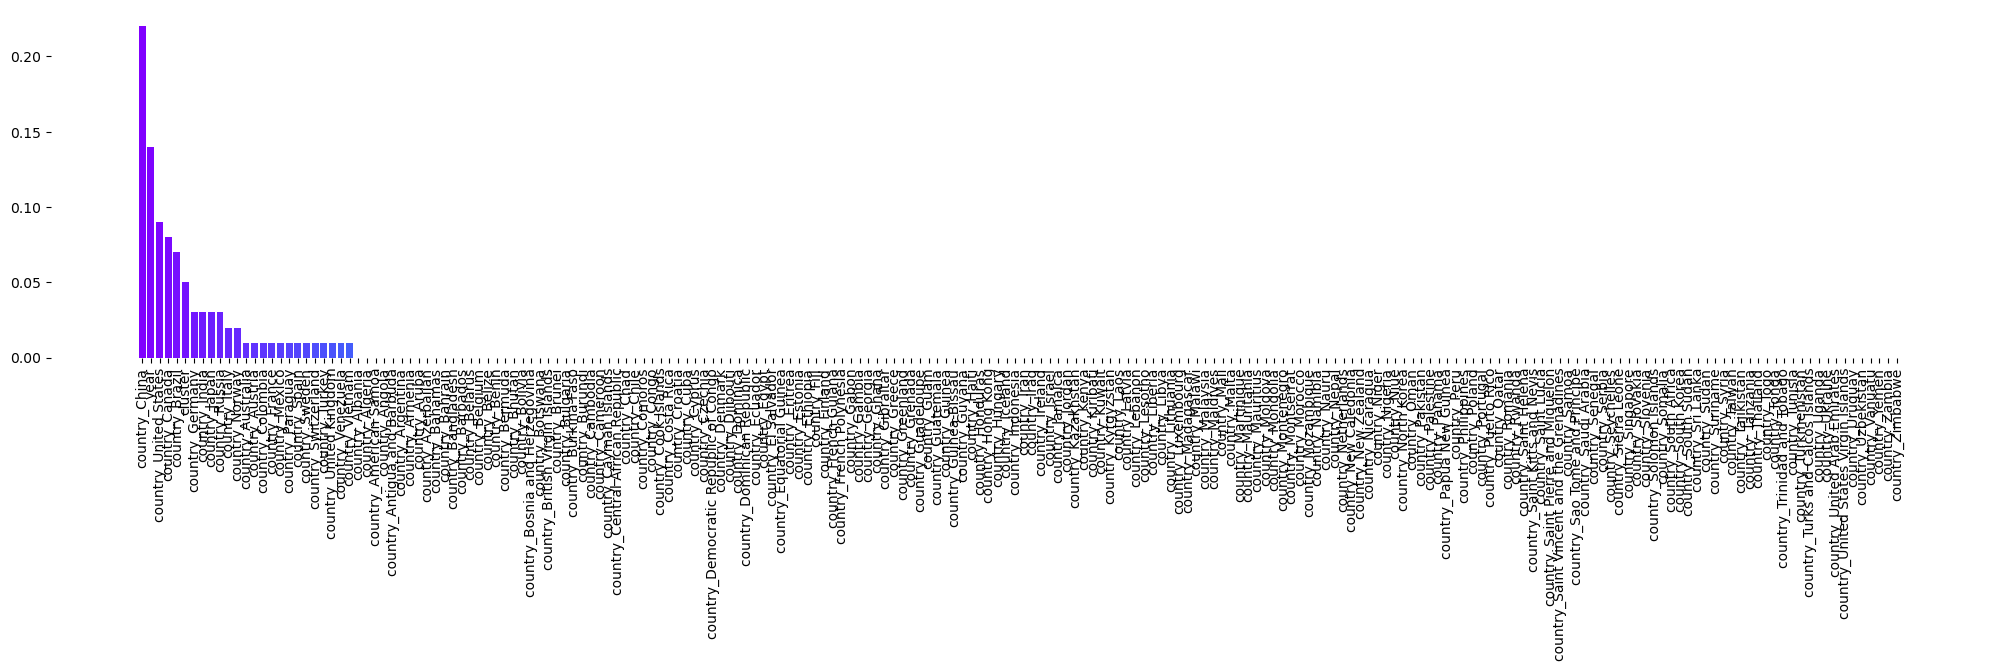

In [48]:
feature_importance(regresor_rf2, X.columns)

In [38]:
# Valores para los parametros a optimizar
param_grid_rf = {
    'criterion': ['absolute_error'],
    'n_estimators': [70, 80, 90, 100, 120],
    'max_features': ['log2','sqrt'],
    'max_depth': [1, 3, 5, 10, 20, 50],
    'min_samples_leaf': [1, 3, 5, 10, 20, 50]
}

In [39]:
evaluation(y_test, y_pred1)

El error absoluto medio para el modelo es 7.38
El error porcentual absoluto medio para el modelo es inf


C:\Users\Luna\AppData\Local\Temp\ipykernel_3860\476445176.py:14: RuntimeWarning:

divide by zero encountered in divide



In [40]:
evaluation(y_test, y_pred_rf2)

El error absoluto medio para el modelo es 1.54
El error porcentual absoluto medio para el modelo es inf


C:\Users\Luna\AppData\Local\Temp\ipykernel_3860\476445176.py:14: RuntimeWarning:

divide by zero encountered in divide



In [41]:
evaluation(y_test, y_pred_svr)

El error absoluto medio para el modelo es 26.24
El error porcentual absoluto medio para el modelo es inf


C:\Users\Luna\AppData\Local\Temp\ipykernel_3860\476445176.py:14: RuntimeWarning:

divide by zero encountered in divide



In [273]:
# Inicializamos un modelo
grid_regresor = RandomForestRegressor(random_state=42)

In [274]:
# Creamos la busqueda
rf_search = GridSearchCV(estimator=grid_regresor, param_grid=param_grid_rf,
                         cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

In [275]:
# Corremos el gridsearch con una validación usando 3 folds.
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [1, 3, 5, 10, 20, 50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10, 20, 50],
                         'n_estimators': [70, 80, 90, 100, 120]},
             scoring='neg_mean_absolute_error', verbose=2)

## ¿cuál es el mejor estimador?

In [285]:
rf_search.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      max_features='sqrt', random_state=42)

In [286]:
rf_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [287]:
rf_search.best_score_

-0.40161094078431414

In [288]:
# Asignamos el mejor estimador a mejor_regresor
mejor_regresor = RandomForestRegressor(criterion='absolute_error', n_estimators=70, max_depth=5, max_features='sqrt', min_samples_leaf=10)

In [289]:
# Entrenamos el modelo
mejor_regresor.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      max_features='sqrt', min_samples_leaf=10,
                      n_estimators=70)

In [290]:
# Hacemos la prediccion para el test de evaluación
predicciones = mejor_regresor.predict(X_test)

In [291]:
# Error
evaluation(y_test, predicciones)

El error absoluto medio para el modelo es 0.47
El error porcentual absoluto medio para el modelo es nan


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16216\476445176.py:14: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean((np.abs(y_test - predictions)/y_test)*100)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16216\476445176.py:14: RuntimeWarning: invalid value encountered in divide
  mape = np.mean((np.abs(y_test - predictions)/y_test)*100)


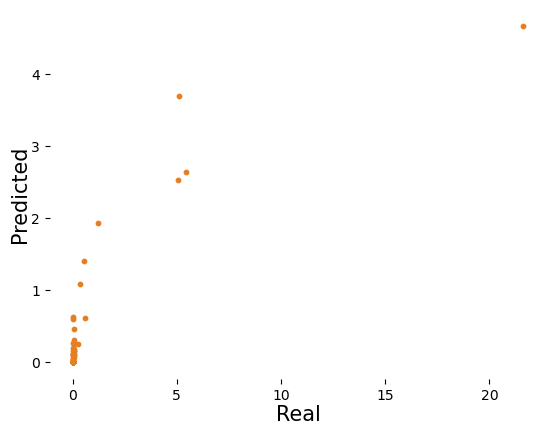

In [292]:
# Correlacion
graph_real_pred(y_test, predicciones, color='#E67E22')

Variable: wind_share_elec Importance: 0.26
Variable: wind_elec_per_capita Importance: 0.19
Variable: solar_electricity Importance: 0.11
Variable: other_renewables_share_elec Importance: 0.07
Variable: coal_electricity Importance: 0.04
Variable: nuclear_electricity Importance: 0.04
Variable: other_renewables_elec_per_capita Importance: 0.04
Variable: solar_share_elec Importance: 0.04
Variable: gas_electricity Importance: 0.03
Variable: primary_energy_consumption Importance: 0.03
Variable: electricity_generation Importance: 0.02
Variable: fossil_electricity Importance: 0.02
Variable: Brazil Importance: 0.02
Variable: coal_share_elec Importance: 0.01
Variable: coal_elec_per_capita Importance: 0.01
Variable: other_renewable_electricity Importance: 0.01
Variable: renewables_electricity Importance: 0.01
Variable: hydro_elec_per_capita Importance: 0.01
Variable: low_carbon_elec_per_capita Importance: 0.01
Variable: solar_elec_per_capita Importance: 0.01
Variable: biofuel_electricity Importanc

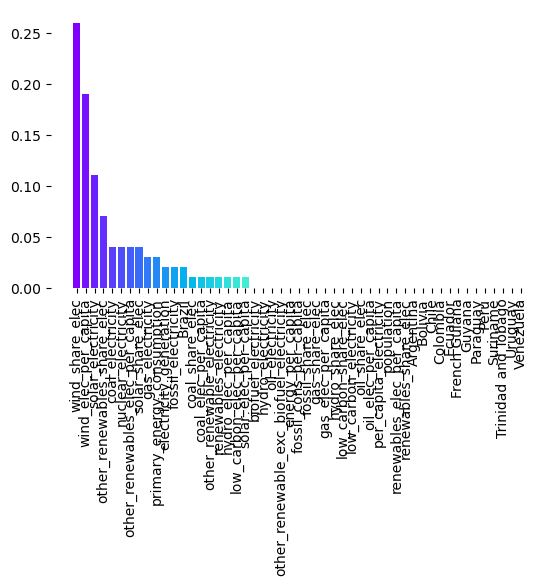

In [294]:
# Importancia de cada feature
feature_importance(mejor_regresor, lista_atributos)